In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Country-data.csv")
#Step1- Date preprocessing 

In [4]:
df.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [12]:

df.iloc[6:,:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.620,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.900,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.100,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.600,67.5,4.67,1310


In [85]:
#checking the dataset
df.shape

(167, 10)

In [86]:
#checking if there are null values. 

if df.isnull().values.any():
    print("Dataframe contains null values")
else:
    print("Dataframe does not contain null values")

Dataframe does not contain null values


In [87]:
# Check for duplicates in the entire dataframe
if df.duplicated().any():
    print("Dataframe contains duplicates")
else:
    print("Dataframe does not contain duplicates")

Dataframe does not contain duplicates


In [88]:
#checking the correlation for feature selection
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


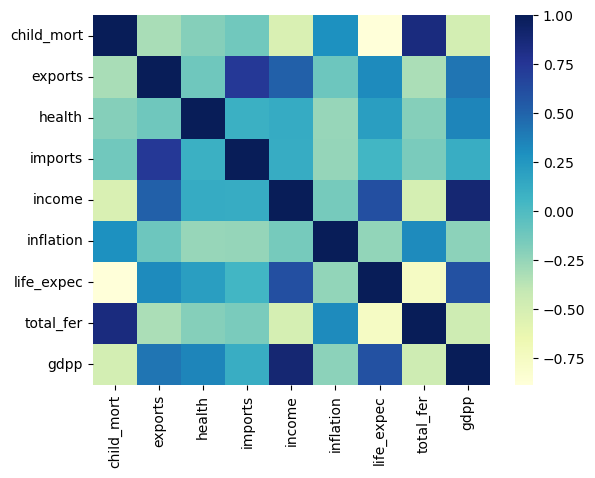

In [89]:
corr_matrix = df.corr()
# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [90]:
CX = df[["income", "child_mort"]]

<AxesSubplot:>

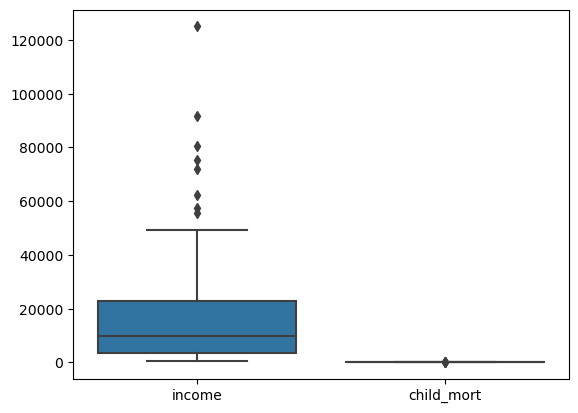

In [91]:
sns.boxplot(data=CX)

Text(0, 0.5, 'child_mort')

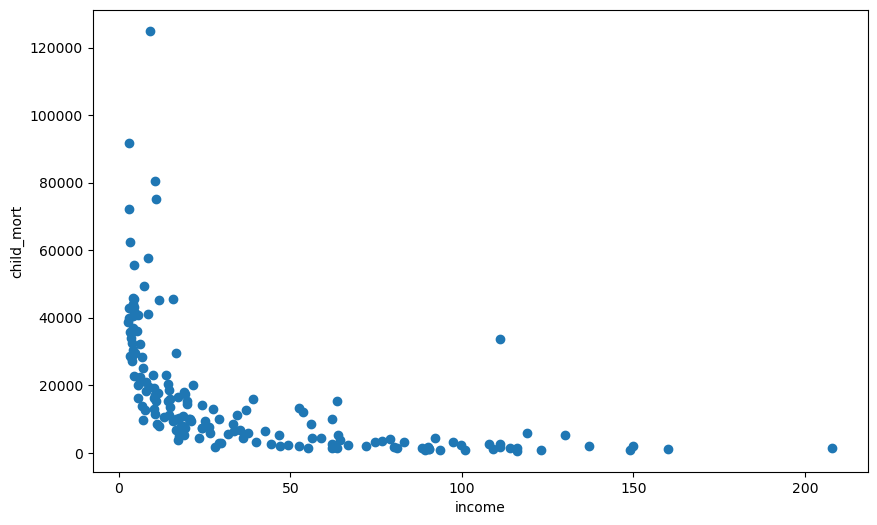

In [92]:
plt.figure(figsize=(10,6))
plt.scatter(df['child_mort'],df['income'])
plt.xlabel('income')
plt.ylabel('child_mort')

In [93]:
Q1 = CX.quantile(0.25)
Q3 = CX.quantile(0.75)
IQR = Q3 - Q1

In [94]:
IQR

income        19445.00
child_mort       53.85
dtype: float64

In [95]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [96]:
outliers = ((CX < lower_bound) | (CX > upper_bound)).any(axis=1)

In [97]:
print("Number of outliers:", outliers.sum())

Number of outliers: 12


In [98]:
print("Indices of outliers:", CX[outliers].index)

Indices of outliers: Int64Index([23, 31, 32, 66, 82, 91, 114, 123, 132, 133, 145, 157], dtype='int64')


In [99]:
# Remove the outliers from the dataset
X = CX[~outliers]

In [100]:
X.shape

(155, 2)

In [101]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state = 42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

In [102]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(X)
    sum_of_sqr_dist[k] = km.inertia_

C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [104]:
#standardized the data 
scaler = StandardScaler()
data_std = scaler.fit_transform(X)
data_std = pd.DataFrame(data_std, columns=CX.columns)

In [105]:
data_std.head()

,income,child_mort
0,-0.975316,1.519064
1,-0.342660,-0.566539
2,-0.116820,-0.263333
3,-0.649103,2.335170
4,0.354630,-0.745062


In [106]:
def optimise_k_means(data_std, max_k):
   
    inertias = {}

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data_std)
 
        
        inertias.append(kmeans.inertia_)


In [107]:
# Calculate Sum of squared distances of samples to their closest cluster center for elbow method 
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state = 42, max_iter = 1000)
    kmeans.fit(data_std)
    inertias.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

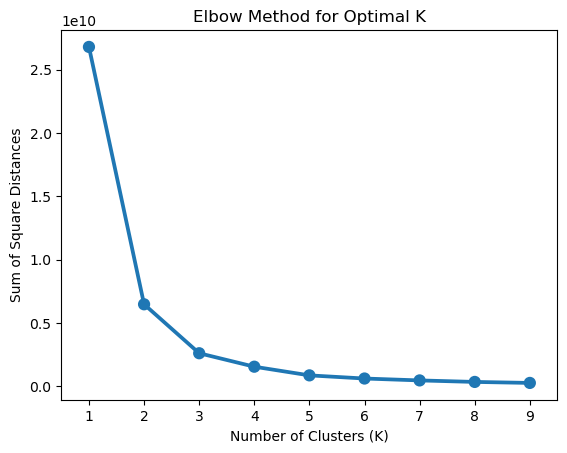

In [108]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()


In [109]:
Model = KMeans(n_clusters=3,
             init='k-means++',
             max_iter=1000)
Model.fit(data_std)

C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=3)

In [110]:
print("Labels", Model.labels_)

Labels [1 2 2 1 2 2 2 0 0 2 2 0 1 2 2 0 2 1 2 2 2 2 2 2 1 1 2 1 0 2 2 2 2 1 1 1 2
 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 2 0 1 2 2 2 0 0 0 2 0
 2 2 1 1 2 1 2 2 1 1 0 2 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 1 1 2 0 0 1 1 0 1 2
 2 2 2 2 0 2 2 1 2 0 1 2 2 0 0 2 2 0 0 2 2 1 2 0 1 1 2 1 1 2 2 2 1 1 2 0 0
 2 2 2 2 2 1 1]


In [111]:
print("Centroids", Model.cluster_centers_)

Centroids [[ 1.70962135 -0.87989122]
 [-0.81998267  1.38499873]
 [-0.20378534 -0.44364956]]


In [112]:
centroids = Model.cluster_centers_

In [113]:
data_std_cluster = data_std.copy()
data_std_cluster["Cluster"] = Model.fit_predict(data_std)

C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [114]:
data_std_cluster

,income,child_mort,Cluster
0,-0.975316,1.519064,2
1,-0.342660,-0.566539,1
2,-0.116820,-0.263333,1
3,-0.649103,2.335170,2
4,0.354630,-0.745062,1
...,...,...,...
150,-0.873422,-0.209493,1
151,0.156925,-0.552370,1
152,-0.756320,-0.376681,1
153,-0.757080,0.558440,2


In [115]:
#Visualizing Clusters
Color = ['red', 'blue', 'black']
data_std_cluster['Color'] = data_std_cluster['Cluster'].map(lambda p:Color[p])

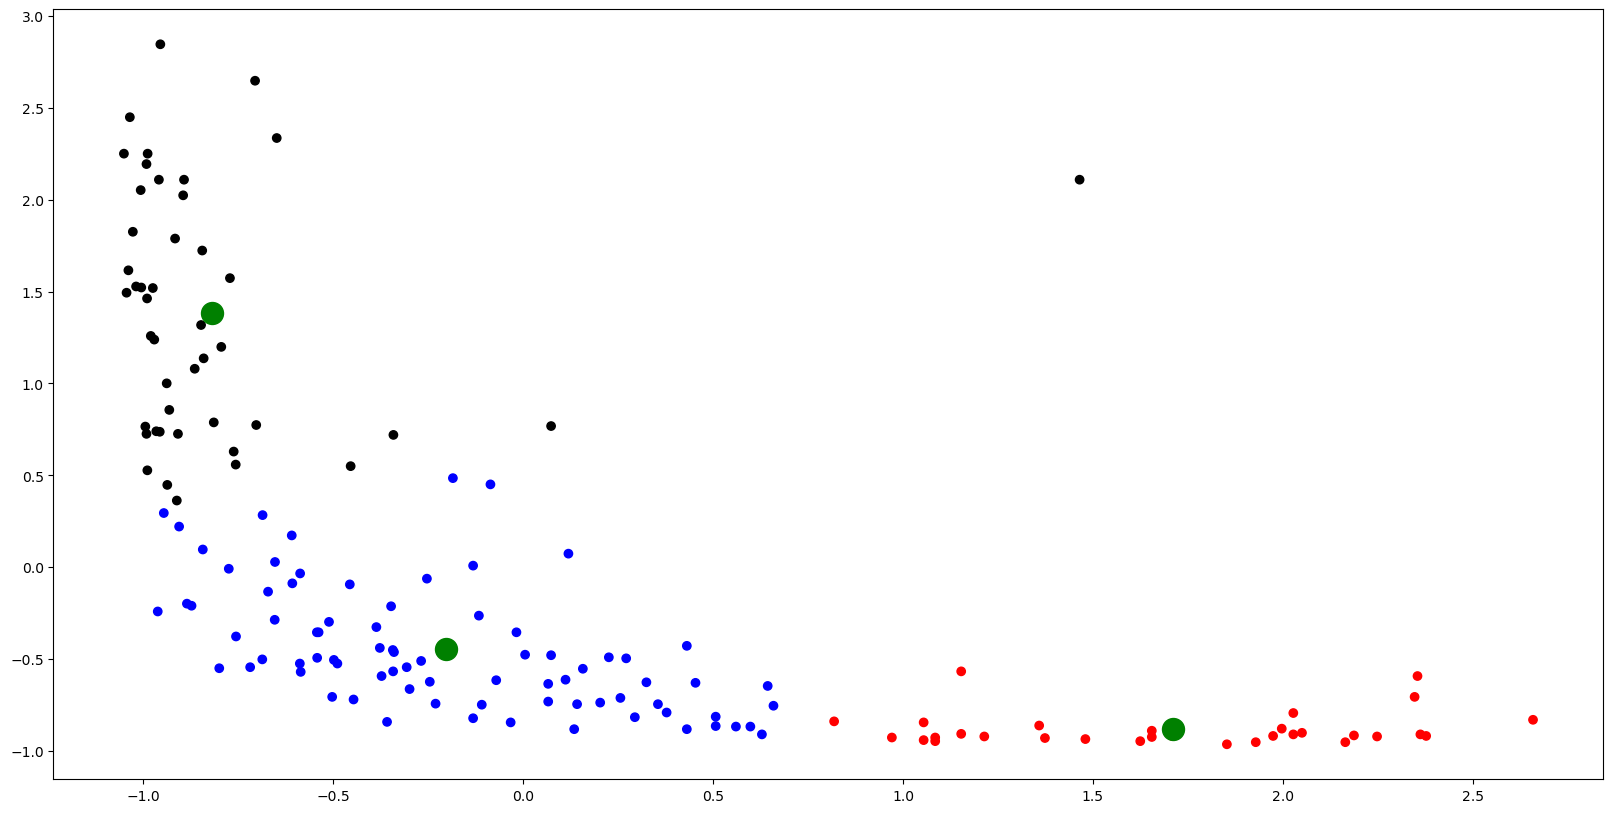

In [116]:
plt.figure(figsize=(20, 10))
plt.scatter(data_std["income"],
           data_std["child_mort"],
           c=data_std_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()

In [117]:
#Evaluation with Silhouette Score
labels = Model.labels_

In [122]:
silhouette_score(data_std, labels)

0.5569354023241216

In [123]:


silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(data_std)
    silhouette[k] = silhouette_score(data_std, km.labels_)



C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

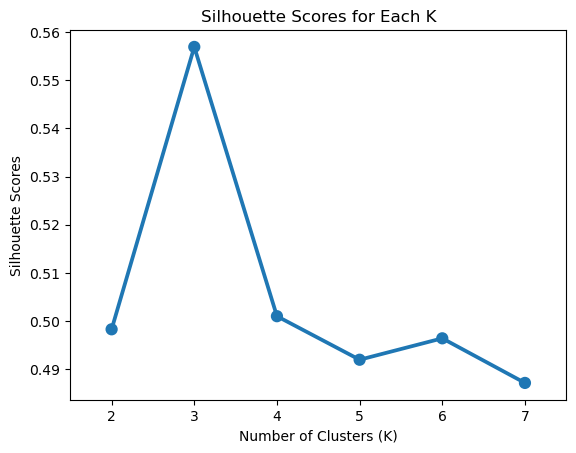

In [124]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

In [130]:
data_std['labels'] = labels

In [131]:
grouped_data = data_std.groupby('labels').agg(['mean', 'median'])

In [132]:
grouped_data

income           child_mort           label       
            mean    median       mean    median  mean median
labels                                                      
0       1.709621  1.708150  -0.879891 -0.917918   0.0    0.0
1      -0.203785 -0.268901  -0.443650 -0.509865   1.0    1.0
2      -0.819983 -0.937296   1.384999  1.317872   2.0    2.0